## Imports

In [1]:
from datasets import load_dataset
import glob
import pandas as pd
import matplotlib.pyplot as plt

## Lendo dataset traduzido

In [2]:
dataset_path = "translated/*.parquet"

dataset = load_dataset("parquet", data_files=dataset_path)

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

In [3]:
parquet_files = glob.glob("translated/*.parquet")

df_list = [pd.read_parquet(file) for file in parquet_files]
df = pd.concat(df_list, ignore_index=True)

print(f"Total de linhas: {len(df)}")

Total de linhas: 40826


In [4]:
df

,id,text,anger,disgust,fear,joy,sadness,surprise
0,oro_train_track_a_00001,"A treta tá feia, o grupo TPLF tá causando mó c...",0,0,1,0,0,0
1,oro_train_track_a_00002,"trabalho massa aqui, só na vibe com a galera",0,0,0,1,0,0
2,oro_train_track_a_00003,"Eita, tá difícil pra nós, viu!",0,0,0,1,0,0
3,oro_train_track_a_00004,"Mohammed Deksiso deu um show, mas se tivesse f...",0,0,0,1,0,0
4,oro_train_track_a_00005,Manda a braba aí do Abbaa Booraa pra geral!,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
40821,deu_train_track_a_02235,fiquei 5 anos dependente de crystal. (chegava ...,0,0,0,1,0,0
40822,deu_train_track_a_00727,"valeu pelo AMA, ignora esses losers que só tão...",0,0,0,0,0,0
40823,deu_train_track_a_01606,"uma desumanização atrás da outra, até quando o...",1,1,0,0,1,0
40824,deu_train_track_a_01669,"massa, a polícia tá no trem pq tem um doidão f...",1,1,0,0,0,0


## Transformações

In [5]:
df['language'] = df['id'].str.split('_').str[0]

In [6]:
grouped = df.groupby("language")[["anger", "disgust", "fear", "joy", "sadness", "surprise"]].sum()

In [7]:
grouped

,anger,disgust,fear,joy,sadness,surprise
language,,,,,,
afr,42,12,121,530,175,-1216
arq,592,412,446,306,808,626
ary,756,132,238,600,492,492
chn,2336,802,140,1054,706,352
deu,1524,1642,468,1046,1008,314
eng,321,-2716,1578,658,860,817
esp,984,1308,634,1284,618,842
hau,816,658,654,640,1294,692
oro,636,556,123,1087,295,127


In [8]:
df['disgust'].unique()

array([ 0,  1, -1])

Provavelmente foi posto paralinguagens que não possuem aquele sentimento

In [9]:
disgust_negatives = df[df["disgust"] == -1]
disgust_negatives['language'].unique()

array(['eng'], dtype=object)

Isso mesmo, foi posto em linguagens como INGLÊS que não possuem esses dados, vamos transformar essses -1 em 0 para facilitar as análises

In [10]:
emotions_columns = ["anger", "disgust", "fear", "joy", "sadness", "surprise"]

df[emotions_columns] = df[emotions_columns].replace(-1, 0)

## Análisando comportamento

In [11]:
grouped = df.groupby("language")[emotions_columns].sum()

total_emotions_per_language = grouped.sum(axis=1)
percentuals = grouped.div(total_emotions_per_language, axis=0) * 100
df_combined = grouped.astype(str) + " (" + percentuals.round(2).astype(str) + "%)"

In [12]:
df_combined

,anger,disgust,fear,joy,sadness,surprise
language,,,,,,
afr,42 (4.77%),12 (1.36%),121 (13.75%),530 (60.23%),175 (19.89%),0 (0.0%)
arq,592 (18.56%),412 (12.92%),446 (13.98%),306 (9.59%),808 (25.33%),626 (19.62%)
ary,756 (27.9%),132 (4.87%),238 (8.78%),600 (22.14%),492 (18.15%),492 (18.15%)
chn,2336 (43.34%),802 (14.88%),140 (2.6%),1054 (19.55%),706 (13.1%),352 (6.53%)
deu,1524 (25.39%),1642 (27.36%),468 (7.8%),1046 (17.43%),1008 (16.79%),314 (5.23%)
eng,321 (7.58%),0 (0.0%),1578 (37.27%),658 (15.54%),860 (20.31%),817 (19.3%)
esp,984 (17.35%),1308 (23.07%),634 (11.18%),1284 (22.65%),618 (10.9%),842 (14.85%)
hau,816 (17.16%),658 (13.84%),654 (13.76%),640 (13.46%),1294 (27.22%),692 (14.56%)
oro,636 (22.52%),556 (19.69%),123 (4.36%),1087 (38.49%),295 (10.45%),127 (4.5%)


Quantidade de dados por linguagem:
language
som    6738
chn    5252
deu    5106
hau    4284
esp    3992
oro    3422
ary    3204
vmw    3094
eng    2716
arq    1802
afr    1216
Name: count, dtype: int64


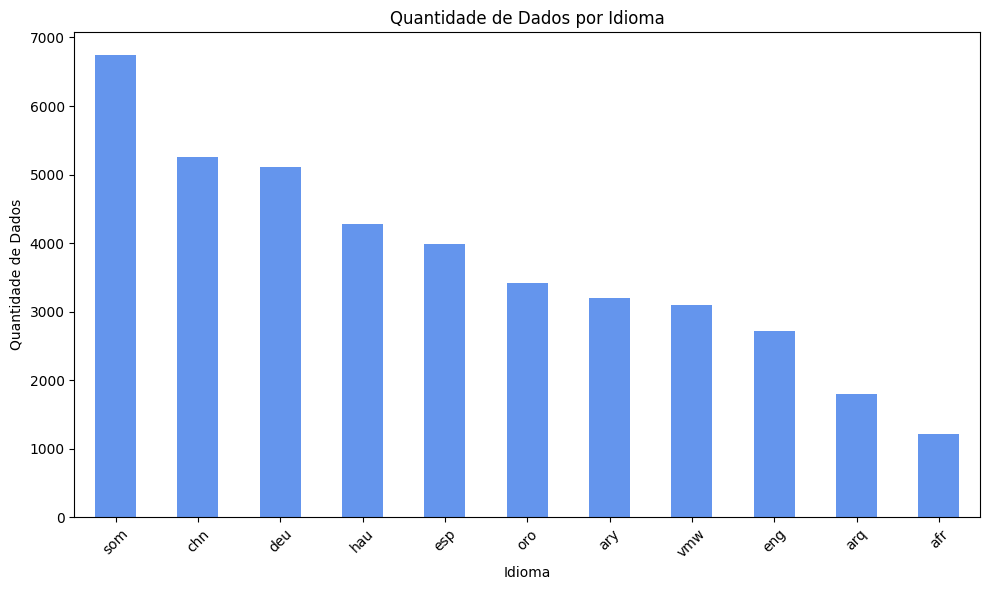

In [13]:
language_counts = df["language"].value_counts()

print("Quantidade de dados por linguagem:")
print(language_counts)

# Gráfico de barras para visualização
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='cornflowerblue')
plt.title("Quantidade de Dados por Idioma")
plt.xlabel("Idioma")
plt.ylabel("Quantidade de Dados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

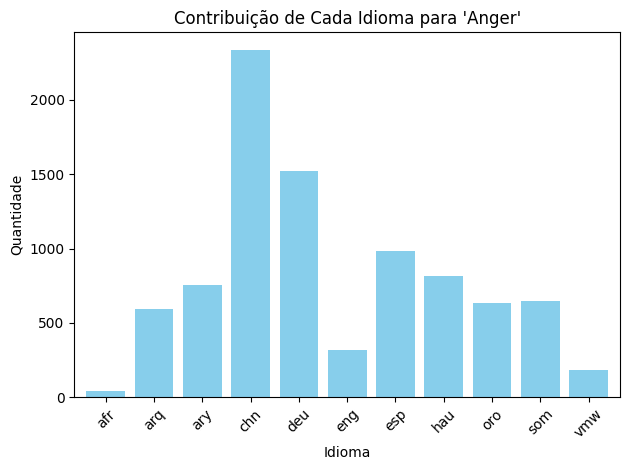

<Figure size 1000x600 with 0 Axes>

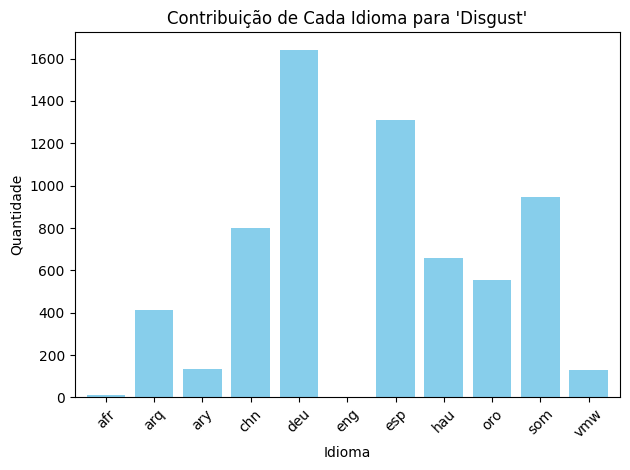

<Figure size 1000x600 with 0 Axes>

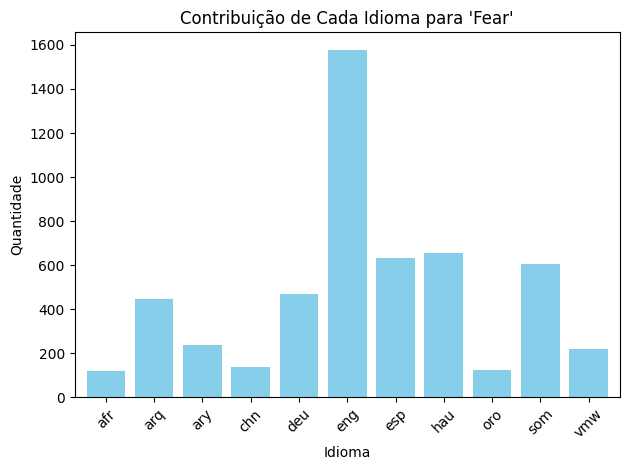

<Figure size 1000x600 with 0 Axes>

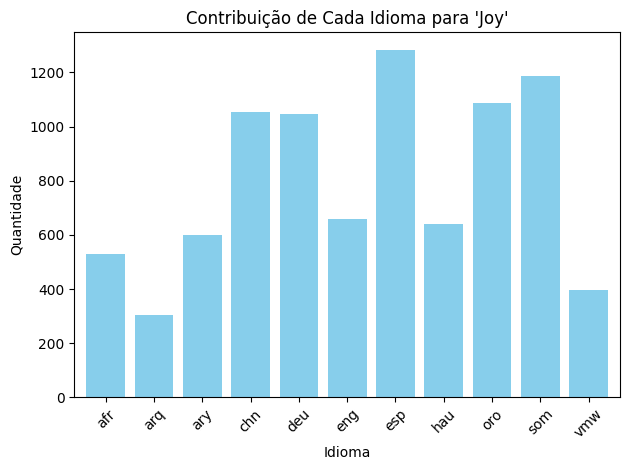

<Figure size 1000x600 with 0 Axes>

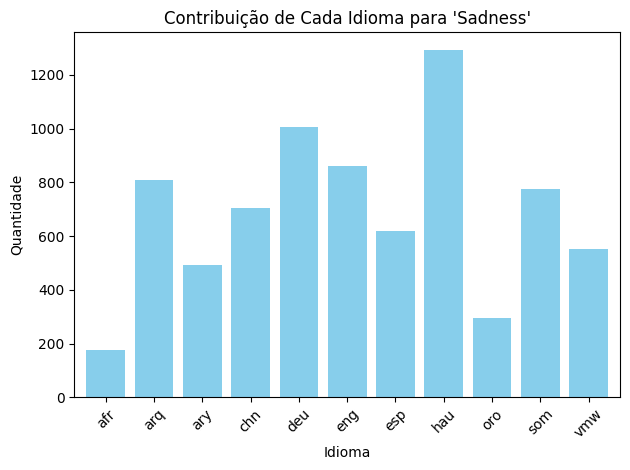

<Figure size 1000x600 with 0 Axes>

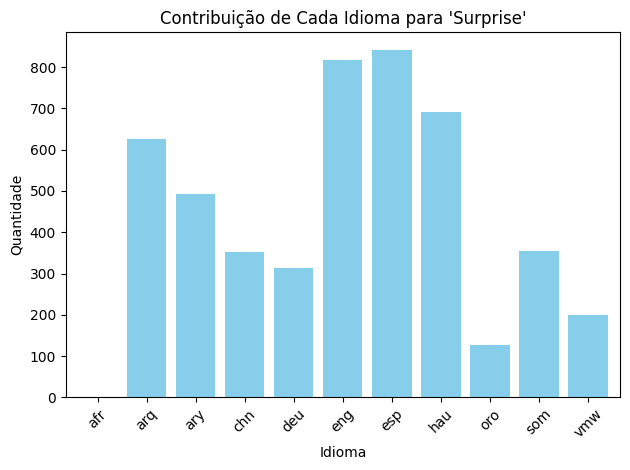

In [14]:
import matplotlib.pyplot as plt

# Criar gráficos de barras para cada emoção
for emotion in emotions_columns:
    plt.figure(figsize=(10, 6))
    grouped_by_emotion = grouped[[emotion]]  # Filtrar apenas a emoção atual
    grouped_by_emotion.plot(kind='bar', legend=False, color='skyblue', width=0.8)
    plt.title(f"Contribuição de Cada Idioma para '{emotion.capitalize()}'")
    plt.xlabel("Idioma")
    plt.ylabel("Quantidade")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Comparando dados 

In [15]:
def get_data(dir= 'data', split= 'train', track= 'a', language= 'ptbr'):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'{dir}/{split}/track_{track}/{archive}'
    
    return pd.read_csv(path)

ptbr = get_data(track= 'a')

In [16]:
df

,id,text,anger,disgust,fear,joy,sadness,surprise,language
0,oro_train_track_a_00001,"A treta tá feia, o grupo TPLF tá causando mó c...",0,0,1,0,0,0,oro
1,oro_train_track_a_00002,"trabalho massa aqui, só na vibe com a galera",0,0,0,1,0,0,oro
2,oro_train_track_a_00003,"Eita, tá difícil pra nós, viu!",0,0,0,1,0,0,oro
3,oro_train_track_a_00004,"Mohammed Deksiso deu um show, mas se tivesse f...",0,0,0,1,0,0,oro
4,oro_train_track_a_00005,Manda a braba aí do Abbaa Booraa pra geral!,0,0,0,0,0,0,oro
...,...,...,...,...,...,...,...,...,...
40821,deu_train_track_a_02235,fiquei 5 anos dependente de crystal. (chegava ...,0,0,0,1,0,0,deu
40822,deu_train_track_a_00727,"valeu pelo AMA, ignora esses losers que só tão...",0,0,0,0,0,0,deu
40823,deu_train_track_a_01606,"uma desumanização atrás da outra, até quando o...",1,1,0,0,1,0,deu
40824,deu_train_track_a_01669,"massa, a polícia tá no trem pq tem um doidão f...",1,1,0,0,0,0,deu


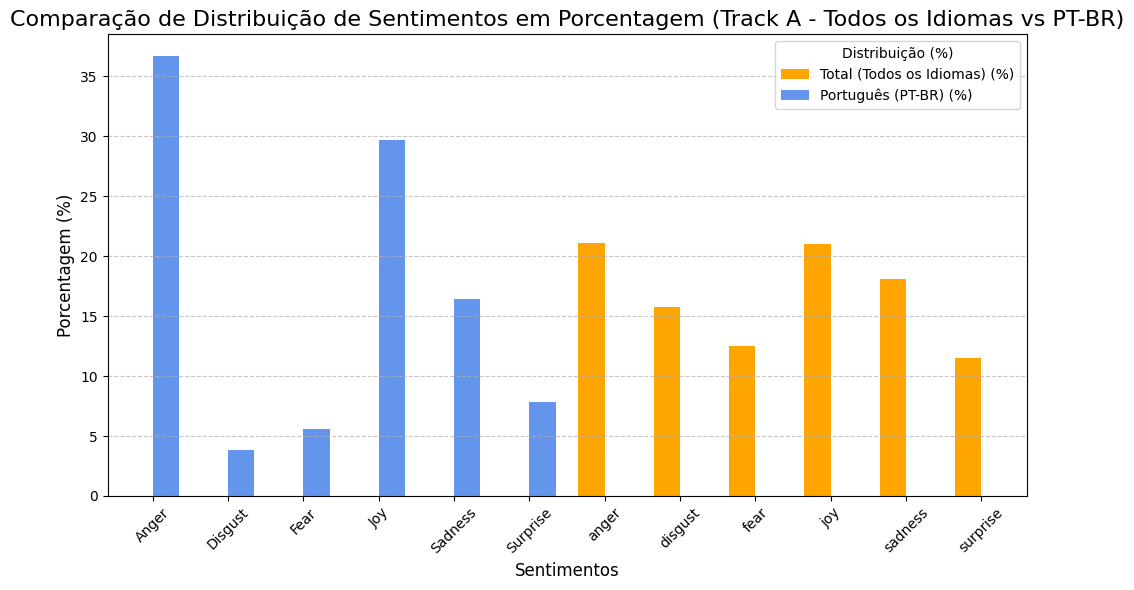

In [ ]:
count_ones_df = (df.drop(columns=['id', 'text', 'language']) == 1).sum()
count_ones_ptbr = (ptbr.drop(columns=['id', 'text']) == 1).sum()

total_ones_df = count_ones_df.sum()
total_ones_ptbr = count_ones_ptbr.sum()

percent_ones_df = (count_ones_df / total_ones_df) * 100
percent_ones_ptbr = (count_ones_ptbr / total_ones_ptbr) * 100

comparison_percent_df = pd.DataFrame({
    "Total (Todos os Idiomas) (%)": percent_ones_df,
    "Português (PT-BR) (%)": percent_ones_ptbr
})

comparison_percent_df.plot(kind='bar', width=0.7, color=['orange', 'cornflowerblue'], figsize=(10, 6))
plt.title('Comparação de Distribuição de Sentimentos em Porcentagem (Track A - Todos os Idiomas vs PT-BR)', fontsize=16)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xlabel('Sentimentos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Distribuição (%)", fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()